In [1]:
import tensorflow as tf

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from reader import create_inputs

In [4]:
image, label = create_inputs(1)

In [5]:
queue = tf.FIFOQueue(256, ['uint8', 'uint8'])

In [6]:
enqueue = queue.enqueue([image, label])

In [7]:
input_data = queue.dequeue()

In [8]:
coord = tf.train.Coordinator()

In [9]:
qr = tf.train.QueueRunner(queue, [enqueue])

In [10]:
sess = tf.Session()

In [11]:
qr.create_threads(sess, coord=coord, start=True)

[<Thread(Thread-4, started 140298697029376)>,
 <Thread(Thread-5, started 140298688636672)>]

In [12]:
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

In [13]:
import json
with open('seg_params.json', 'r') as f:
    seg_params = json.load(f)

In [14]:
from model import *
net = SegModel(
    input_channel=1,
    klass=2,
    batch_size=1,
    network_type=seg_params['network_type'],
    kernel_size=seg_params['kernel_size'],
    dilations=seg_params['dilations'],
    strides=seg_params['strides'],
    channels=seg_params['channels'])

In [15]:
image, label = net._preprocess(input_data)

In [20]:
image_data = sess.run(image)

TypeError: run() got an unexpected keyword argument 'cmap'

In [23]:
aaa = image_data.reshape(212, 293)

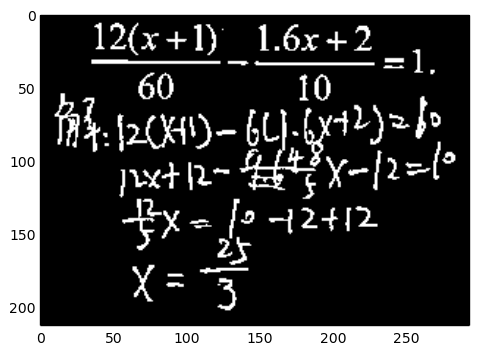

In [24]:
plt.imshow(aaa, cmap ='gray')

In [16]:
output = net._create_network(image)
output_ary = tf.reshape(output, [-1, net.klass])

In [17]:
init = tf.initialize_all_variables()
sess.run(init)

In [18]:
h_pad = (4 - tf.shape(image)[1] % 4) % 4
w_pad = (4 - tf.shape(image)[2] % 4) % 4
pad_image = tf.pad(image, [[0, 0], [h_pad, 0], [w_pad, 0], [0, 0]])

In [19]:
a, b = sess.run([image, pad_image])

In [21]:
b.shape

(1, 216, 296, 1)

In [2]:
import tensorflow as tf
a = tf.constant([1,1,1], tf.float32)
b = 1-a
sess = tf.Session()
sess.run(b)

array([ 0.,  0.,  0.], dtype=float32)

In [5]:
t1 = tf.constant([1,2,3])
t2 = tf.constant([4,5,6])
t3 = tf.concat(0, [t1, t2])
t3.get_shape()


TensorShape([Dimension(6)])

In [18]:
d1, d2, d3 = sess.run([output, output_ary, label])

In [19]:
d1.shape

(1, 194, 261, 2)

In [20]:
ret = d3.reshape(194, 261)

In [21]:
ret[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

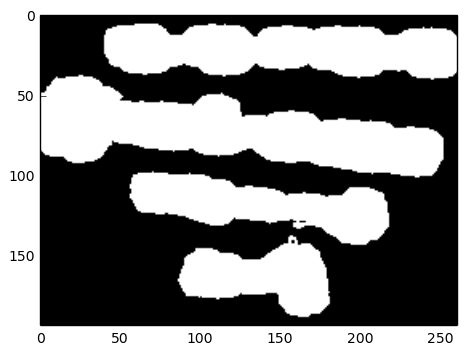

In [22]:
plt.imshow(ret, cmap ='gray')

In [35]:
plt.show()

In [3]:
from scipy import misc
img = misc.imread('target.png', mode='L')
ori_img = misc.imread('ori_target.png', mode='L')

In [36]:
img.shape

(194, 261)

In [12]:
data_list = [ ]
for h in range(194):
    for w in range(261):
        if ori_img[h][w] == 0:
            data_list.append(0)
            continue
        if img[h][w] == 255:
            data_list.append(1)
        else:
            data_list.append(2)
print(len(data_list))
newFile = open ("my.dat", "wb")
newFileByteArray = bytearray(data_list)
print(len(newFileByteArray))
newFile.write(newFileByteArray)

50634
50634


In [13]:
import tensorflow as tf
str_tensor = tf.read_file("my.dat")
dd = tf.decode_raw(str_tensor, tf.uint8)
sess = tf.Session()
test_d = sess.run(dd)

In [14]:
print test_d.shape
test_img = test_d.reshape(194, 261)

(50634,)


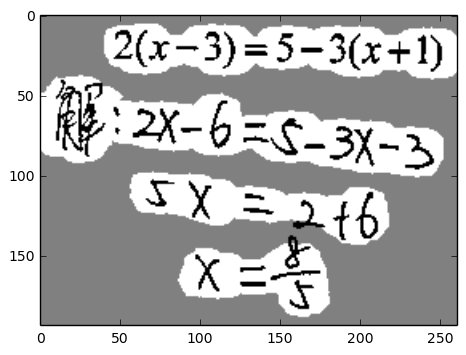

In [17]:
plt.imshow(test_img, cmap ='gray')

In [7]:
from scipy import misc
ori_img = misc.imread('./training_set/images/0ced4c24-b0c0-11e6-ad35-d017c2cf90d9.png',  mode='RGB')

In [8]:
ori_img.shape

(450, 800, 3)

In [9]:
from matplotlib import pyplot as plt
%matplotlib inline

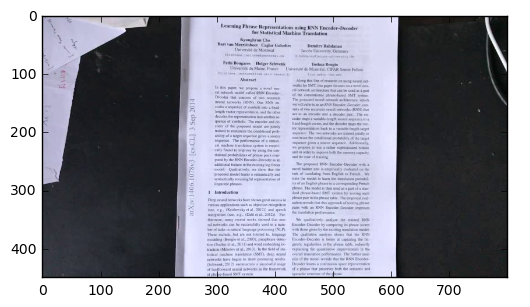

In [10]:
plt.imshow(ori_img)